# Ford Gobike Data Exploration and Visualization

This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import pakages
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\Tony Tech\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Assessing:

In [2]:
#load data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# overview of data shape and composition
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [5]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [6]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
df.isnull().sum() 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Data Cleaning:
##### -remove nans 
##### -change dates to datetime
##### -divide "start_time" colum to two columns(start_hour, start_day)
##### -change the data type for "bike_share_for_all_trip to" be bool
##### -convert "duration_sec" to duration by minutes 
##### -add "member_age" column


In [9]:
#remove nans
df.dropna(inplace= True)

In [10]:
df.isnull().sum().sum()

0

In [11]:
#change date to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [12]:
df[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  174952 non-null  datetime64[ns]
 1   end_time    174952 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.0 MB


In [13]:
#divide start_time colum to two columns(start_hour, start_day)
df['start_hour'] = df.start_time.dt.strftime('%H')
df['start_day'] = df.start_time.dt.strftime('%A')

In [14]:
#change the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [15]:
df[['bike_share_for_all_trip']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 1 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   bike_share_for_all_trip  174952 non-null  bool 
dtypes: bool(1)
memory usage: 1.5 MB


In [16]:
#add 'member_age' column
df['member_age'] = 2021 - df['member_birth_year']

In [17]:
#convert 'duration_sec' to duration by minutes
df['duration_mins'] = df['duration_sec']/60

In [18]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,member_age,duration_mins
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,17,Thursday,37.0,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,12,Thursday,49.0,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,17,Thursday,32.0,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,23,Thursday,47.0,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False,23,Thursday,62.0,29.883333


In [19]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,duration_mins
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,36.196865,11.733379
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731,27.370082
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,20.000000,1.016667
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,29.000000,5.383333
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,34.000000,8.500000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,41.000000,13.150000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,143.000000,1409.133333


In [20]:
df.shape

(174952, 20)

### Data Exploration:

## The structure of the dataset 
<br>
- The data after wrangling contains 174952 individual trip records with 20 variables collected. The variables can be divided into 4 major categories:<br>

#### 1- trip duration info: <br>
(duration_sec, duration_mins) <br>
<br>
#### 2- station info: <br>
(start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude) <br>
<br>
#### 3- time info: <br>
(start_time, start_hour, start_day, end_time) <br>
<br>
#### 4- user info: <br>
(bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, member_age)
<br>
<br>
##### Variables are drived to 11 numerical variables, and others are 4 datetime, 4 object 'string' type and 1 is boolean type.

### What is/are the main feature(s) of interest in the dataset?
<br>
- in my opinion the main feature to the company will be the trip duration and how it changes by the influence of other features.
<br>
<br>
- also, how trip duration may influnece other features.
<br>
<br>
- some important other features are (start and end station, start hour, start day, gender and age)

### What features in the dataset will help support the investigation into feature(s) of interest?
<br>
- the start station and end station will affect duration owing to the distance between them.
<br>
- user type, member gender and member age will also affect the duration of the trip.
<br>
- Also 'bike_share_for_all_trip' may affect the duration of the trip.

## Univariate Exploration:

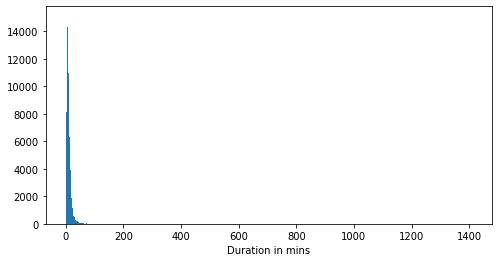

In [21]:
# start by looking for the distribution of the main variable
plt.figure(figsize=[8, 4])
bins = np.arange(df['duration_mins'].min(), df['duration_mins'].max(), 1)
plt.hist(data= df, x='duration_mins', bins=bins)
plt.xlabel('Duration in mins');

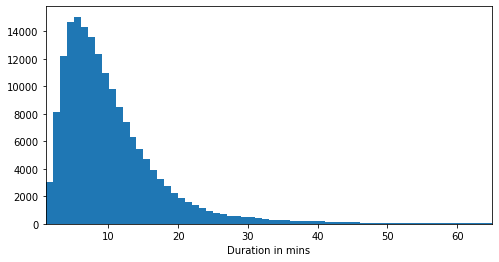

In [22]:
# looking for duration between 1 min and 1 hour
plt.figure(figsize=[8, 4])
bins = np.arange(df['duration_mins'].min(), df['duration_mins'].max(), 1)
plt.hist(data= df, x='duration_mins', bins=bins)
plt.xlim(1, 65)
plt.xlabel('Duration in mins');


In [23]:
# lets's try to change the scale 
np.log(df.duration_mins.describe())

count    12.072267
mean      2.462438
std       3.309451
min       0.016529
25%       1.683308
50%       2.140066
75%       2.576422
max       7.250730
Name: duration_mins, dtype: float64

In [24]:
np.log(60)

4.0943445622221

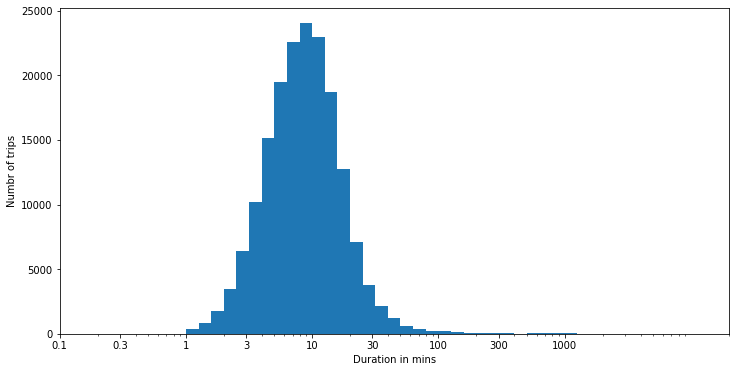

In [25]:
plt.figure(figsize=[12, 6])
# Get the ticks for bins between [0 - maximum duration]
bins = 10 ** np.arange(0, 4.09+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data= df, x='duration_mins', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels)
plt.xlabel('Duration in mins')
plt.ylabel('Numbr of trips');

###### looks like there's not many trips exceed one hour duration and most trips are between 3 to 30 minutes.


### Now, let's look to the variables that describe the users

In [26]:
# let's look to the age
df.member_age.describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

In [27]:
df[df['member_age'] >= 80]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,member_age,duration_mins
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,True,19,Thursday,121.0,2.466667
2085,694,2019-02-28 18:21:05.187,2019-02-28 18:32:39.596,107.0,17th St at Dolores St,37.763015,-122.426497,89.0,Division St at Potrero Ave,37.769218,-122.407646,385,Subscriber,1941.0,Male,False,18,Thursday,80.0,11.566667
5197,217,2019-02-28 13:51:46.238,2019-02-28 13:55:24.127,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931.0,Male,False,13,Thursday,90.0,3.616667
5266,384,2019-02-28 13:35:05.428,2019-02-28 13:41:30.223,84.0,Duboce Park,37.769200,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931.0,Male,False,13,Thursday,90.0,6.400000
5447,147,2019-02-28 13:08:56.935,2019-02-28 13:11:24.062,84.0,Duboce Park,37.769200,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931.0,Male,False,13,Thursday,90.0,2.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,False,18,Friday,119.0,8.616667
177955,377,2019-02-01 18:23:33.411,2019-02-01 18:29:50.795,26.0,1st St at Folsom St,37.787290,-122.394380,321.0,5th St at Folsom,37.780146,-122.403071,5444,Subscriber,1933.0,Female,True,18,Friday,88.0,6.283333
179280,355,2019-02-01 14:32:42.247,2019-02-01 14:38:37.896,134.0,Valencia St at 24th St,37.752428,-122.420628,131.0,22nd St at Dolores St,37.755000,-122.425728,1815,Subscriber,1938.0,Male,False,14,Friday,83.0,5.916667
182830,428,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901.0,Male,False,07,Friday,120.0,7.133333


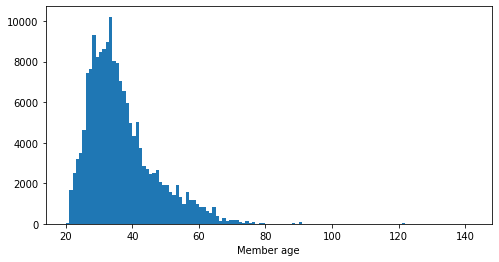

In [28]:
# show age distribution
plt.figure(figsize=[8, 4])
bins = np.arange(df['member_age'].min(), df['member_age'].max(), 1)
plt.hist(data= df, x='member_age', bins=bins)
plt.xlabel('Member age');

###### looks like there's some data limitations in the age columns because there's some ages that exceeds 100 !!, so we will limit our data to the age of 80

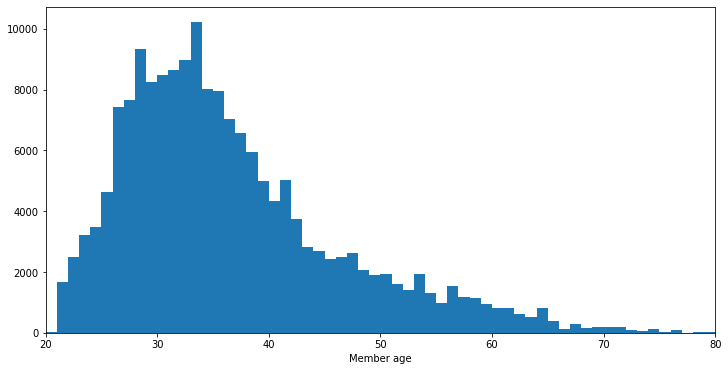

In [29]:
# show age distribution
plt.figure(figsize=[12, 6])
bins = np.arange(df['member_age'].min(), df['member_age'].max(), 1)
plt.hist(data= df, x='member_age', bins=bins)
plt.xlim(20, 80)
plt.xlabel('Member age');

###### looks like that our main course of  users are young people between 20's and 40's, but to make the data more obvious we are going to do some more wrangling by dividing "member_age" column to three categories (young, middle aged, old).

In [30]:
# make new column that divide member age to three categories ['young', 'middle aged', 'old']
bin_edges = [20, 40, 60, 80]
bin_labels = ['young', 'middle aged', 'old']

df['member_age_group'] = pd.cut(df['member_age'], bin_edges, labels = bin_labels)

In [31]:
# now we have a new column
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,member_age,duration_mins,member_age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,False,17,Thursday,37.0,869.750000,young
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,False,12,Thursday,49.0,1030.900000,middle aged
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,False,17,Thursday,32.0,608.166667,young
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,True,23,Thursday,47.0,26.416667,middle aged
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,False,23,Thursday,62.0,29.883333,old


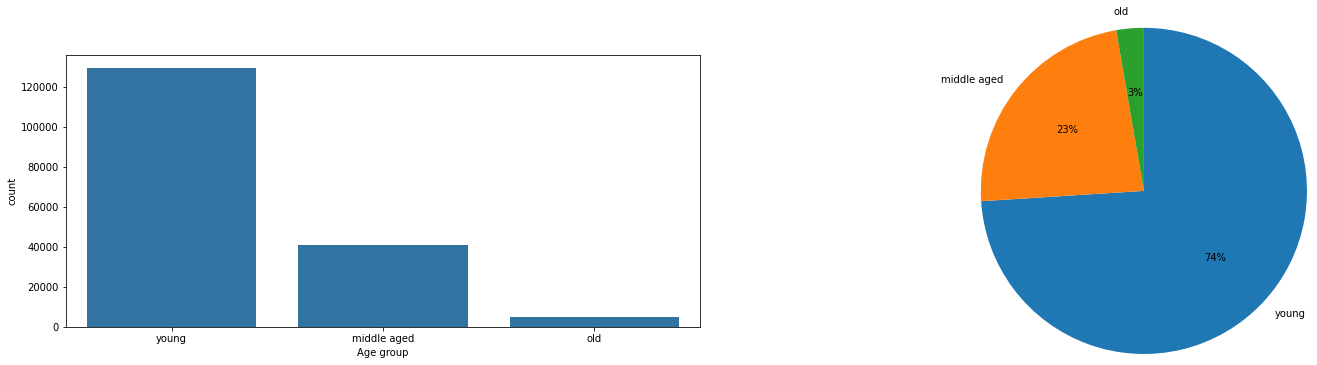

In [32]:
# show age group distibution
base_color = sb.color_palette()[0]
plt.figure(figsize=[25, 5])

plt.subplot(1, 2, 1)
sb.countplot(data= df, x = df['member_age_group'], color = base_color)
plt.xlabel('Age group');

plt.subplot(1, 2, 2)
plt.pie(df['member_age_group'].value_counts(), labels = ['young', 'middle aged', 'old'],
        startangle = 90, counterclock = False, radius = 1.5, autopct = '%0.0f%%');

###### looks like that about 75% of our users are young people between 20's and 40's

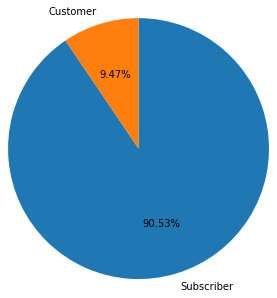

In [33]:
# show user type distribution
plt.pie(df['user_type'].value_counts(), labels = ['Subscriber', 'Customer'],
        startangle = 90, counterclock = False, radius = 1.5, autopct = '%0.2f%%');

###### looks like that about 90% of our users are subscribers

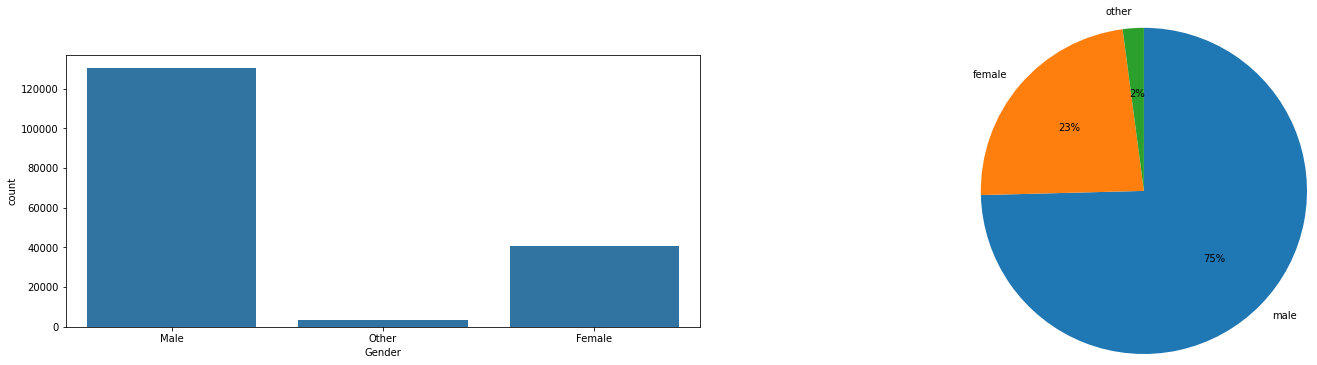

In [34]:
# let's look to the gender
base_color = sb.color_palette()[0]
plt.figure(figsize=[25, 5])

plt.subplot(1, 2, 1)
sb.countplot(data= df, x = df['member_gender'], color = base_color)
plt.xlabel('Gender');

plt.subplot(1, 2, 2)
plt.pie(df['member_gender'].value_counts(), labels = ['male', 'female', 'other'],
        startangle = 90, counterclock = False, radius = 1.5, autopct = '%0.0f%%');

###### looks like that about 75% of our users are males

### Now, let's look to the variables that describe the time of the trip

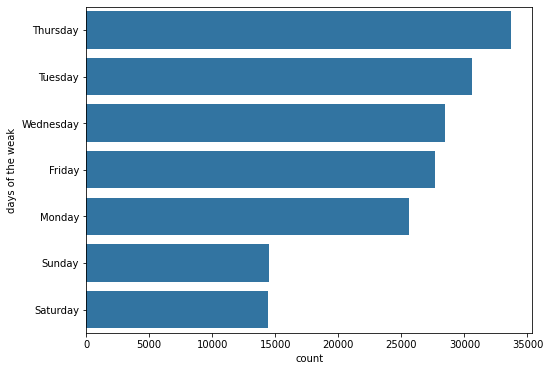

In [35]:
# let's see the distribution of trips in week days
plt.figure(figsize=[8, 6])
sb.countplot(data= df, y = df['start_day'], color = base_color, order = df['start_day'].value_counts().index)
plt.ylabel('days of the weak');

###### it looks like the trip count is decreased by 50% during Sunday and Saturday

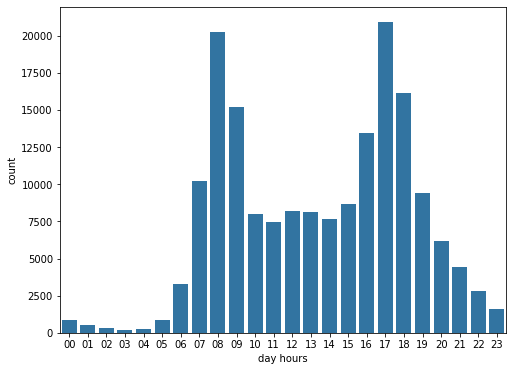

In [36]:
plt.figure(figsize=[8, 6])
sb.countplot(data= df, x = df['start_hour'], color = base_color)
plt.xlabel('day hours');

###### it looks like that most of trips are occur between 7 a.m and 8 p.m, and it reachs to the peak at 8 a.m and 5 p.m

### Now, let's look to the variables that describe the start and end stations

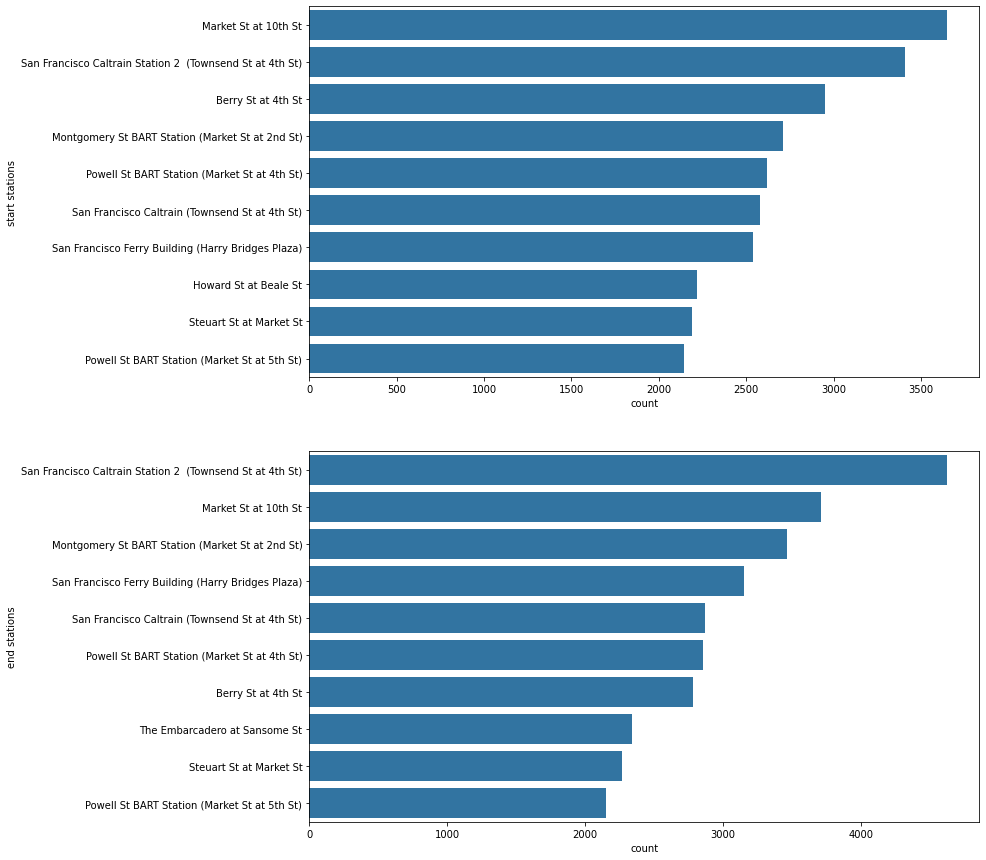

In [37]:
plt.figure(figsize=[12, 15])

plt.subplot(2, 1, 1) 
sb.countplot(data= df, y = df['start_station_name'], color = base_color, order = df['start_station_name'].value_counts()
             .index[:10])
plt.ylabel('start stations');

plt.subplot(2, 1, 2) 
sb.countplot(data= df, y = df['end_station_name'], color = base_color, order = df['end_station_name'].value_counts()
             .index[:10])
plt.ylabel('end stations');

###### it looks like the popular start stations are almost the popular end stations too.

## Bivariate Exploration:

###### Now let's take the trip duration and put it against other variabels that may affect it

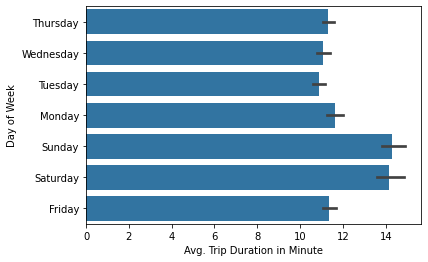

In [38]:
# build barplot between duration time against week days
sb.barplot(data= df, y='start_day', x='duration_mins', color=base_color);
plt.ylabel('Day of Week');
plt.xlabel('Avg. Trip Duration in Minute');

###### looks like Sunday and Saturday have the highest duration average

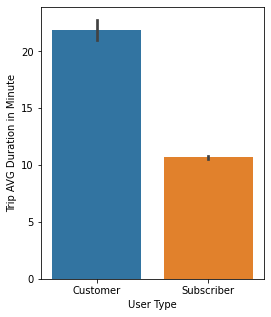

In [39]:
# bar plot between user type and duration 
plt.figure(figsize=[4, 5])

sb.barplot(data= df, x='user_type', y='duration_mins')
plt.xlabel('User Type')
plt.ylabel('Trip AVG Duration in Minute');

###### looks like Customers have higher average duration than Subscribers, however Subscribers have the higher number of trips

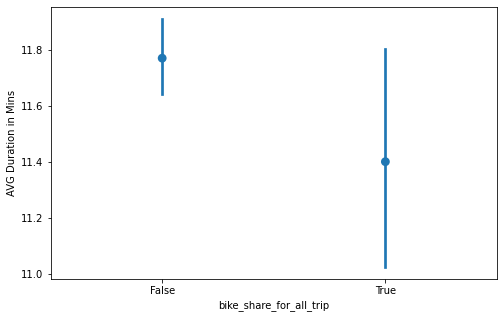

In [40]:
# pointplot between 'bike_share_for_all_trip' and duration
plt.figure(figsize=[8, 5])
sb.pointplot(data = df, x = 'bike_share_for_all_trip', y = 'duration_mins', linestyles= '')
plt.ylabel('AVG Duration in Mins');

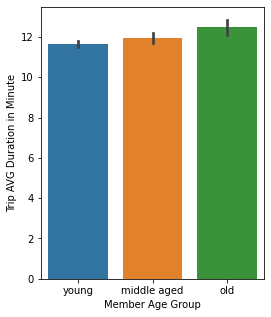

In [41]:
# barplot between age group and duration
plt.figure(figsize=[4, 5])

sb.barplot(data= df, x='member_age_group', y='duration_mins')
plt.xlabel('Member Age Group')
plt.ylabel('Trip AVG Duration in Minute');

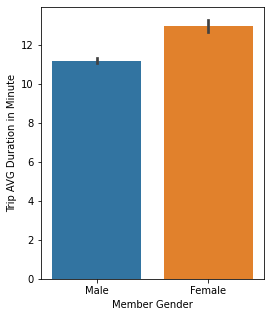

In [42]:
# make the gender between male and females
x_data = df.query("member_gender == 'Male' | member_gender == 'Female'")

# barplot between duration and gender
plt.figure(figsize=[4, 5])
sb.barplot(data= x_data, x='member_gender', y='duration_mins')
plt.xlabel('Member Gender')
plt.ylabel('Trip AVG Duration in Minute');

###### Looking to the variables we conclude that :<br>
<br>
1- Sunday and Saturday have the highest duration average with lower number of trips.
<br>
2- Customers have higher average duration than Subscribers.
<br>
3- Bike share for all trip works only with trips that have lower duration.
<br>
4- it looks like that the age group doesn't affect the duration of the trip that much.
<br>
5- females have higher average duration trips, while men have higher trip number.

###### let's devide those variables to subgroups to look for patterns :

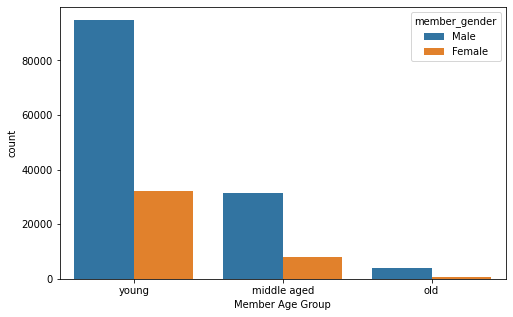

In [43]:
# divide the age group to subgroups of member gender
plt.figure(figsize=[8, 5])
sb.countplot(data = x_data, x = 'member_age_group', hue = 'member_gender')
plt.xlabel('Member Age Group');

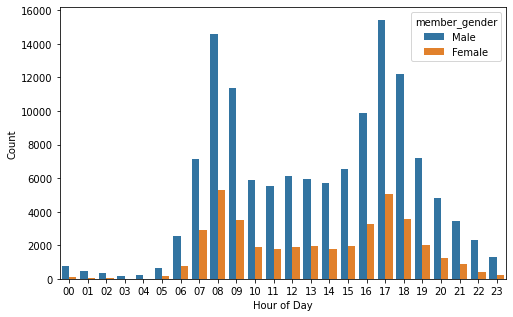

In [44]:
# divide day hours to subgroups of member gender
plt.figure(figsize=[8, 5])
sb.countplot(data= x_data, x='start_hour', hue='member_gender');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

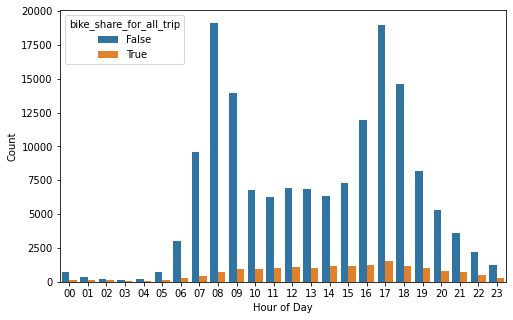

In [45]:
# divide day hours to subgroups of bike share for all trip or not
plt.figure(figsize=[8, 5])
sb.countplot(data= x_data, x='start_hour', hue='bike_share_for_all_trip');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

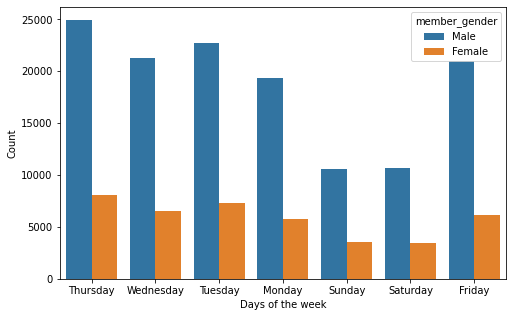

In [46]:
# divide week days to subgroups of member gender
plt.figure(figsize=[8, 5])
sb.countplot(data= x_data, x='start_day', hue='member_gender');
plt.xlabel('Days of the week');
plt.ylabel('Count');

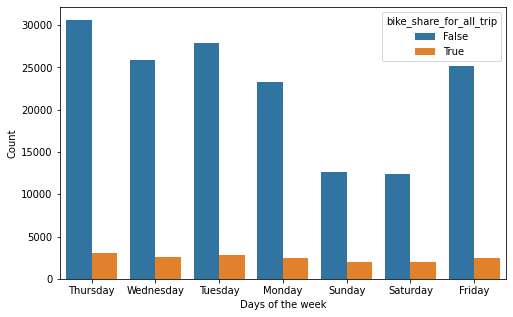

In [47]:
# divide week days to subgroups of bike share for all trip or not
plt.figure(figsize=[8, 5])
sb.countplot(data= df, x='start_day', hue='bike_share_for_all_trip');
plt.xlabel('Days of the week');
plt.ylabel('Count');

## Multivariate Exploration:

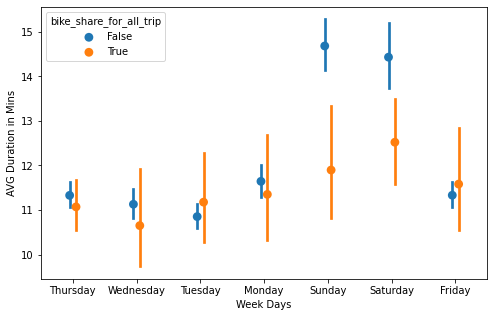

In [48]:
# dividinge week days to subgroups of bike share for all trip or not against average duration
plt.figure(figsize=[8, 5])
sb.pointplot(data = df, x = 'start_day', y = 'duration_mins', hue = 'bike_share_for_all_trip', dodge = 0.1, linestyles= '')
plt.xlabel('Week Days')
plt.ylabel('AVG Duration in Mins');

###### looks like the average duartion of trips is almost the same eiher bike share all trip or not, except on sunday and monday

In [49]:
# exclude Sundays and Saturdays
x1 = df.query("start_day == 'Thursday' | start_day == 'Wednesday' | start_day == 'Tuesday' | start_day == 'Monday' | start_day == 'Friday'")
x1.start_day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Name: start_day, dtype: int64

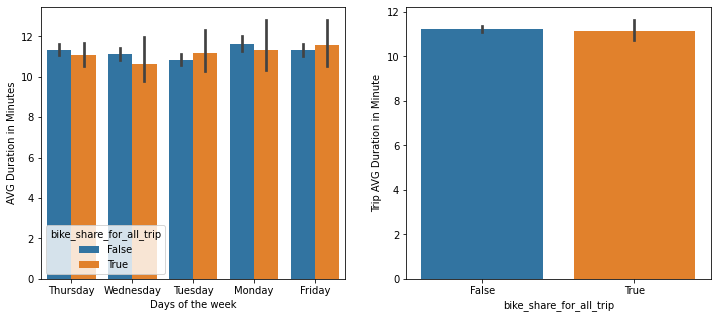

In [50]:
# plotting bike_share_for_all_trip without Sundays and Saturdays
plt.figure(figsize=[12, 5])

plt.subplot(1,2,1)
sb.barplot(data= x1, x='start_day', y = 'duration_mins', hue='bike_share_for_all_trip');
plt.xlabel('Days of the week');
plt.ylabel('AVG Duration in Minutes')

plt.subplot(1,2,2)
sb.barplot(data= x1, x='bike_share_for_all_trip', y='duration_mins')
plt.xlabel('bike_share_for_all_trip')
plt.ylabel('Trip AVG Duration in Minute');

###### now, let's look how gender distributed between variables (week days, age group, user type)

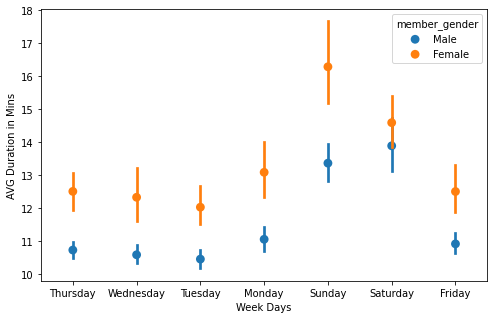

In [51]:
# dividing week days to subgroups according to gender
plt.figure(figsize=[8, 5])
sb.pointplot(data = x_data, x = 'start_day', y = 'duration_mins', hue = 'member_gender', linestyles= '')
plt.xlabel('Week Days')
plt.ylabel('AVG Duration in Mins');

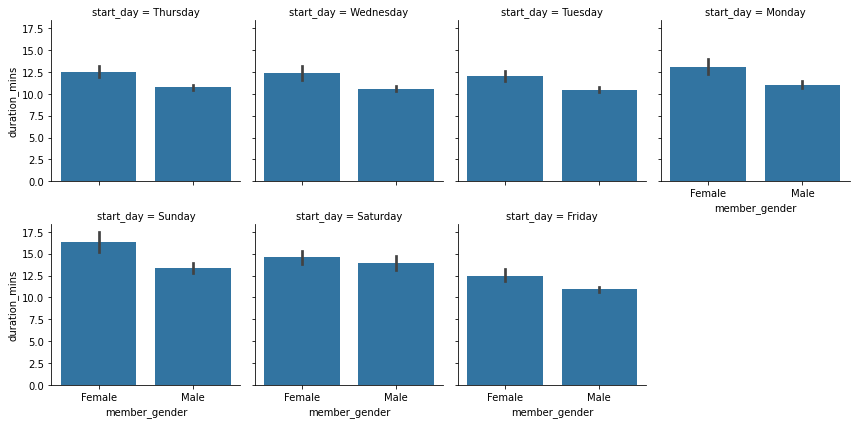

In [52]:
# looking to gender on each day of week individually
g = sb.FacetGrid(data = x_data, col = 'start_day', col_wrap = 4)
g.map(sb.barplot, 'member_gender', 'duration_mins', order = ['Female', 'Male']);

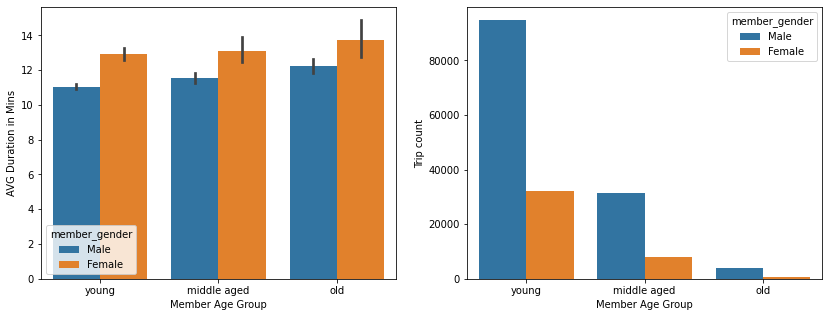

In [53]:
# dividing each age group by gender
plt.figure(figsize=[14, 5])

plt.subplot(1,2,1)
sb.barplot(data = x_data, x = 'member_age_group', y = 'duration_mins', hue = 'member_gender')
plt.xlabel('Member Age Group')
plt.ylabel('AVG Duration in Mins')

plt.subplot(1,2,2)
sb.countplot(data = x_data, x = 'member_age_group', hue = 'member_gender')
plt.xlabel('Member Age Group')
plt.ylabel('Trip count');

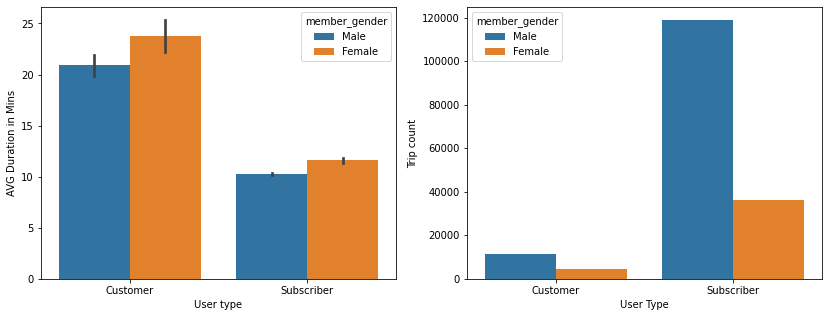

In [54]:
# dividing each user type by gender
plt.figure(figsize=[14, 5])

# gender and user type against average duration
plt.subplot(1,2,1)
sb.barplot(data = x_data, x = 'user_type', y = 'duration_mins', hue = 'member_gender')
plt.xlabel('User type')
plt.ylabel('AVG Duration in Mins')

# gender and user type against trip count
plt.subplot(1,2,2)
sb.countplot(data = x_data, x = 'user_type', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Trip count');

###### females have higher average duration trips, while men have higher trip couunt.

###### let's look to other member variables across each individual day...

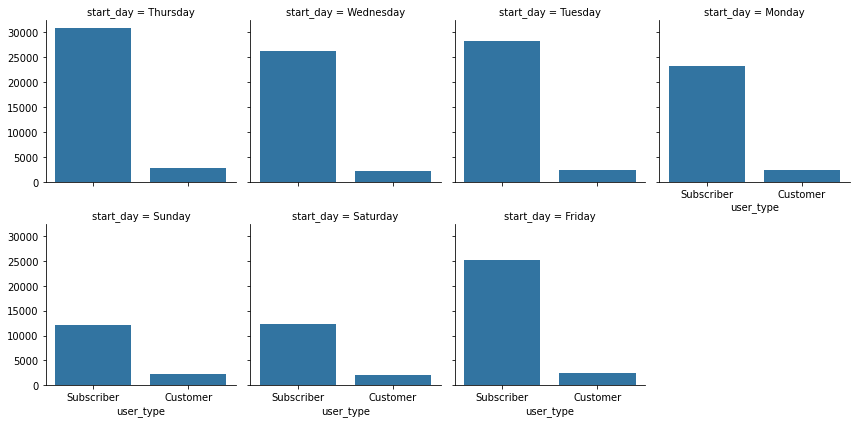

In [55]:
# looking to user type on each day of week individually
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap = 4)
g.map(sb.countplot, 'user_type', order = ['Subscriber', 'Customer']);

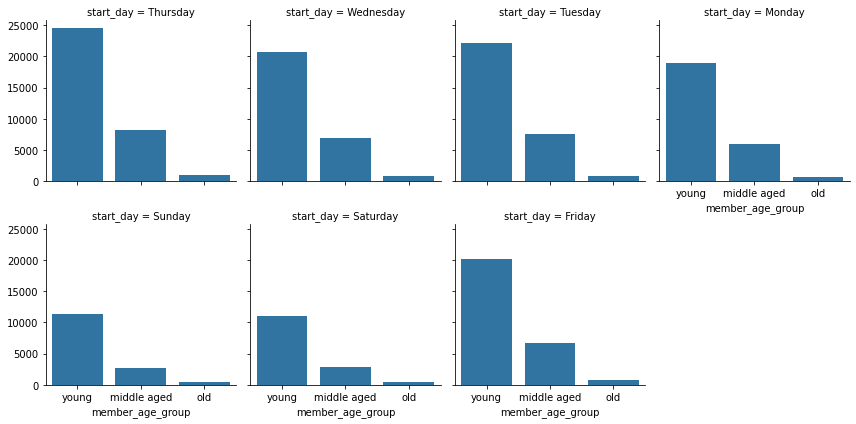

In [56]:
# looking to age group on each day of week individually
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap = 4)
g.map(sb.countplot, 'member_age_group', order = ['young', 'middle aged', 'old']);

In [1]:

plt.figure(figsize=[14, 5])
# ploting user type divided by subgroups of bike share for all trip against avg duration
plt.subplot(1,2,1)
sb.barplot(data = df, x = 'user_type', y = 'duration_mins', hue = 'bike_share_for_all_trip')
plt.xlabel('User Type')
plt.ylabel('AVG Duration in Mins')
# ploting user type divided by subgroups of bike share for all trip against trip count
plt.subplot(1,2,2)
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.xlabel('User Type')
plt.ylabel('Trip count');

NameError: name 'plt' is not defined

###### looks like Customers never use bike share for all trip, while Subscribers do.

## Conclusions:<br>

1. not many trips exceed one hour duration and most trips are between 3 to 30 minutes.
<br>
2. about 75% of our users are young people between 20's and 40's
<br>
3. more than 90% of our users are subscribers
<br>
4. about 75% of our users are males
<br>
5. the trip count is decreased by 50% during Sunday and Saturday
<br>
6. that most of trips are occur between 7 a.m and 8 p.m, and it reachs to the peak at 8 a.m and 5 p.m
<br>
7. the popular start stations are almost the popular end stations too.
<br>
8. Sunday and Saturday have the highest duration average
<br>
9. Customers have higher average duration than Subscribers, however Subscribers have the higher number of trips
<br>
10. Bike share for all trip works only with trips that have lower duration.
<br>
11. age group doesn't affect the duration of the trip that much.
<br>
12. females have higher average duration trips, while men have higher trip number.
<br>
13. the average duartion of trips is almost the same eiher bike share all trip or not, except on sunday and monday
<br>
14. Customers never use bike share for all trip, while Subscribers do.